#  Алгоритм Гёманса–Уильямсона поиска приближённо максимального разреза с точностью 0.878

## Напоминание некоторых определений:
* Симметрическая матрица X называется неотрицательно определённой, если все её собственные числа неотрицательны. Обозначение $X \succeq 0$ либо X - PSD-матрица
* $Tr(A)$ - след матрицы $A$, то есть сумма диагональных элементов
* $S^n$ - множество симметричных матриц размера $n \times n$
* $S^n_+$ - множество симметричных неотрицательно определённых матриц размера $n \times n$
* SDP-задача - это задача оптимизации (т.е. минимизации или максимизации) некоторой линейной целевой функции на множестве PSD-матриц (возможно, c некоторыми линейными ограничениями). 
* Пусть $\Sigma$ - матрица размера $n \times n$, тогда корнем из $\Sigma$ (обозначение $\sqrt{\Sigma}$) называется такая матрица $A$, что $A\cdot A=\Sigma$. В частности, если $\Sigma$ -  диагональная матрица, то корень из $\Sigma$ - тоже диагональная матрица, причем $\left(\sqrt{\Sigma}\right)_{ii} = \sqrt{\left(\Sigma_{ii}\right)}$

## Постановка задачи:
Дан неориентированный граф $G=(V, E)$ c матрицей весов $W \in {S}^{n} \ $, то есть $W_{uv}$ - вес ребра между вершинами $u$ и $v$. В частности, $W_{uv} = 0 \Leftrightarrow $ в графе нет ребра между вершинами $u$ и $v$.

Найти такое подмножество вершин $S \subset V$, что сумма весов рёбер из вершин, лежащих в $S$, в вершины из $V \backslash S$ максимальна

## Формально:

$$\max\limits_{\mathbf{x}} \frac{1}{4} \sum_{i=1}^{n} \sum_{j=1}^{n} w_{i j}\left(1-x_{i} x_{j}\right)$$

$${\text { т.ч. } x_{i} \in\{+1,-1\}}$$

То есть x - вектор из $\mathbb{R}^n$ такой, что если $x_i = +1$, то i-я вершина идет в первое подмножество вершин (в S), иначе, если $x_i = -1$, то i-я вершина относится ко второму множеству ( $V \backslash S$)

Тогда если $x_u = x_v$, то  $ \ \left(1 - x_u \cdot x_v\right) = 0 \ $ и вес ребра $(u, v)$ не учитывается в сумме

Иначе, $ \ \left(1 - x_u \cdot x_v\right) = 2 \ $ и вес ребра $(u, v)$ учитывается дважды в сумме. Кроме того, для ребра $(v, u)$ происходит все то же самое, поэтому мы домножаем на $\frac{1}{4}$


Перепишем:

$$\max _{x_{i}=\pm 1} \frac{1}{4} \sum_{i, j=1}^{n} w_{i j}\left(1-x_{i} x_{j}\right)=\max _{x_{i}=\pm 1} \frac{1}{4} \sum_{i, j=1}^{n} w_{i j}\left(\frac{x_{i}^{2}+x_{j}^{2}}{2}-x_{i} x_{j}\right) = $$

Это просто потому что $\frac{x_{i}^{2}+x_{j}^{2}}{2} = 1$. Далее, раскроем скобки

$$=\max _{x_{i}=\pm 1} \frac{1}{4}\left(-\sum_{i, j=1}^{n} w_{i j} x_{i} x_{j}+\frac{1}{2} \sum_{i=1}^{n}\left[\sum_{j=1}^{n} w_{i j}\right] x_{i}^{2}+\frac{1}{2} \sum_{j=1}^{n}\left[\sum_{i=1}^{n} w_{i j}\right] x_{j}^{2}\right) = $$

Обозначим $deg(i) := \sum_{j=1}^{n} w_{i j}$. Будем называть это число степенью вершины $i$. Кроме того, $D:= diag\left( deg(1), \ldots , deg(n) \right)$. Тогда:

$$=\max _{x_{i}=\pm 1} \frac{1}{4}\left(-\sum_{i, j=1}^{n} w_{i j} x_{i} x_{j}+\frac{1}{2} \sum_{i=1}^{n} \operatorname{deg}(i) x_{i}^{2}+\frac{1}{2} \sum_{j=1}^{n} \operatorname{deg}(j) x_{j}^{2}\right)$$

Приводя подобные слагаемые, получаем:

$$=\max _{x_{i}=\pm 1} \frac{1}{4}\left(\sum_{i=1}^{n} \operatorname{deg}(i) x_{i}^{2}-\sum_{i, j=1}^{n} w_{i j} x_{i} x_{j}\right)
=\max  _{x_{i}=\pm 1}\frac{1}{4} \left[ \mathbf{x}^{\top} D \mathbf{x} - \mathbf{x}^{\top} W \mathbf{x}\right]
=\max  _{x_{i}=\pm 1}\frac{1}{4} \left[ \mathbf{x}^{\top} \left(D - W\right) \mathbf{x} \right]
=\max _{x_{i}=\pm 1} \frac{1}{4} \mathbf{x}^{\top} {L} \mathbf{x}$$

Где $L = D - W$ - лапласиан графа

Введем $$X := \mathbf{x}  \mathbf{x}^T$$

Заметим, что $$\mathbf{x}^{\top} {L} \mathbf{x} = Tr\left( LX\right)$$

Действительно, 
$$\left( LX \right)_{ii} = \sum_{k=1}^n L_{ik}X_{ki} = \sum_{k=1}^n L_{ik}\mathbf{x}_k\mathbf{x}_i $$
$$Tr\left( LX \right) = \sum_{i=1}^n \sum_{k=1}^n L_{ik}\mathbf{x}_k\mathbf{x}_i $$
Кроме того, легко видеть, что:
$$\mathbf{x}^{\top} {L} \mathbf{x} = \sum_{i=1}^n\sum_{j=1}^n L_{ij}\mathbf{x}_i\mathbf{x}_j$$
Что и требовалось.

Еще раз, мы теперь перешли к рассмотрению матрицы $X$:
$$X_{i j}=x_{i} x_{j}, \quad x_{i}=\left\{\begin{array}{ll}{-1,} & {\text { если } i \in S} \\ {+1,} & {\text { если } i \notin S}\end{array}\right.$$

Наблюдение: $X$ — PSD матрица (ранга 1), на диагонали стоят 1. Действительно, для любой матрицы $Y \in \mathbb{R}^{m \times n}$ и для любого вектора $z \in \mathbb{R}^{n}$ верно: $$z^{T}\left(Y^{T} Y\right)z=(Y z)^{T}(Y z)=\|Y z\|_{2}^{2} \geq 0$$
Из этого сразу следует, что $Y^{T} Y-$ PSD-матрица, а после транспорнирования: $Y Y^{T}-$ PSD-матрица. В частности, $X = \mathbf{x}  \mathbf{x}^T$ PSD-матрица.

И решаем такую задачу:

$$\max _{x_{i}=\pm 1} \frac{1}{4} Tr\left( LX\right)$$

Но это переборная задача - её сложно решить. Поэтому мы делаем то, что называется **релаксация**. То есть мы просто заменяем текущие переборные ограничения ($x_i = \pm 1$) на такие, чтобы задача легко решалась. Например, давайте рассматривать в качестве $X$ все PSD-матрицы, на диагонали которых стоят единички. Тогда получим такую задачу оптимизации:
$$\max \frac{1}{4} Tr\left( LX\right)$$
$$т.ч.{X \succeq 0 \\ X_{i, i} = 1}$$

Она выпуклая, так как $S^n_+ - $  выпуклое, а $X_{i, i} = 1 \ - $ это аффинное ограничение ($i$-й диагональный элемент матрицы легко получить просто домножением этой матрицы на матрицу $M$ из всех нулей, кроме $M_{ii}=1$). Поскольку мы **расширили** допустимое множество для нашей задачи максимизации, то и  новый максимум будет **больше**, чем исходный. Другими словами, $\mathrm{OPT} \geq \mathrm{MAXCUT}$, где  $\mathrm{OPT} \ - $ оптимальное значение релаксации, а $\mathrm{MAXCUT} \ - $ ответ на исходную задачу. 

Известно, что существуют эффективные алгоритмы решения SDP-задач. Формально, есть, например, метод эллипсоидов который решает эту задачу с точностью $\varepsilon$ за $poly(N, R, log(1/\varepsilon))$, где $N$ — длина записи данных, $R$ — логарифм максимального размера допустимого решения. На практике применяются в том числе и некоторые другие методы (например, есть метод внутренней точки), которые достаточно быстро работают на матрицах даже порядка $1000 * 1000$

Далее, пусть $X^*$ - матрица-решение задачи максимизации. Тогда, так как $X^* \in S^n_+$, то существует разложение $X^* = \overline{U}\Sigma \overline{U}^T$, где $\Sigma \ - $ матрица с собственными числами матрицы $X^*$ на диагонали, а $U$ имеет столбцами соответствующие этим собственным числам собственные векторы единичной длины (это называется SVD-разложение). Обозначим $\mathbf{U} := \overline{U}\cdot \sqrt{\Sigma}, \ $ Тогда

$$X^* =\overline{U}\Sigma \overline{U}^T= \left( \overline{U}\cdot \sqrt{\Sigma}\right) \left( \sqrt{\Sigma}\cdot\overline{U}^T \right) = \mathbf{U} \mathbf{U}^T$$

Давайте обозначим $\mathbf{u}_{i} := i$-ая строка матрицы $\mathbf{U}$. Рассмотрим систему векторов $\mathbf{u}_{1}, \ldots, \mathbf{u}_{n}$. Видно, что матрица $\mathbf{X}^* = \mathbf{U} \mathbf{U}^T - $ это матрица Грама этой системы векторов, то есть матрица, элементами которой являются попарные скалярные произведения данных векторов. По условию, $\mathbf{X^*}_{ii} = 1$, значит 

$$\forall i \ \ ||\mathbf{u}_i||^2 = \left\langle \mathbf{u}_i, \mathbf{u}_i \right\rangle = \mathbf{X^*}_{ii} = 1$$

То есть все векторы имеют единичную длину. Это нам пригодится далее.

Теперь мы хотим получить сам разрез. Предлагается такой алгоритм:
1. Сгенерировать случайный вектор $h \in \mathbb{R}^n$ на единичной сфере
2. $S:=\left\{i \ |\left\langle{h}, \mathbf{u}_{i}\right\rangle \geq 0\right\}$, то есть $x_{i}=\operatorname{sign}\left\langle h, \mathbf{u}_{i}\right\rangle$

Мы хотим оценить точность такого алгоритма. Давайте для примера посмотрим на рисунок:
<img src="pic.jpg" style="width: 270px;"/>
Здесь у нас есть 4 вектора $\mathbf{u}_i$ и случайный вектор $h$. В таком случае, вектор $x = (x_1, x_2, x_3, x_4) = \left(\operatorname{sign}\left\langle h, \mathbf{u}_{1}\right\rangle, \operatorname{sign}\left\langle h, \mathbf{u}_{2}\right\rangle, \operatorname{sign}\left\langle h, \mathbf{u}_{3}\right\rangle, \operatorname{sign}\left\langle h, \mathbf{u}_{4}\right\rangle \right) = (+1, -1, -1, +1)$

Теперь мы хотим оценить вероятность того, что вектора $x_1$ и $x_2$ имеют разные знаки:
<img src="pic2.jpg" style="width: 270px;"/>

Можно заметить, что вероятность разных знаков у $x_{1}=\operatorname{sign}\left\langle h, \mathbf{u}_{1}\right\rangle$ и $x_{2}=\operatorname{sign}\left\langle h, \mathbf{u}_{2}\right\rangle$ равна $\vartheta / \pi$, так как разделяющие прямые распределены равномерно.

Далее, оценим мат. ожидание величины разреза (вспоминая нашу изначальную формальную постановку задачи):

$$\mathbb{E}[c(X)]=\frac{1}{2} \sum_{\{i, j\} \subset V, \\ \ \ \ \ i \leq j} w_{i j}\left(1-\mathbb{E}\left[x_{i} x_{j}\right]\right)$$

Поскольку случайная величина $x_{i} x_{j}$ принимает ровно два значения ($\pm 1$), то можно записать её мат. ожидание по определению:

$$\mathbb{E}\left[x_{i} x_{j}\right]=\frac{\vartheta}{\pi} \cdot(-1)+\left(1-\frac{\vartheta}{\pi}\right) \cdot(+1)=1-2 \frac{\vartheta}{\pi}$$

Поэтому, получаем:

$$\mathbb{E}[c(x)]=\sum_{\{i, j\} \subset V, \\ \ \ \ \ i \leq j} w_{i j} \frac{\vartheta_{i j}}{\pi}$$

Теперь вспоминаем, что вектора $\mathbf{u}_i$ имеют единичную длину, а $\mathbf{X^*} - $ матрица Грама, поэтому:

$$
\mathbf{X^*}_{i j}=\left\langle u_{i}, u_{j}\right\rangle=\cos \vartheta_{i j}
$$

Далее, снова запишем мат. ожидание величины разреза, а затем домножим и разделим каждое слагаемое на $\left( 1 - \cos{\vartheta_{ij}} \right)$, при это вынося $\frac{1}{2}$ знак суммы:

$$\mathbb{E}[c(x)]=\sum_{\{i, j\} \subset V, \\ \ \ \ \ i \leq j} w_{i j} \frac{\vartheta_{i j}}{\pi} = \frac{1}{2}\sum_{\{i, j\} \subset V, \\ \ \ \ \ i \leq j} w_{i j} \frac{2 \left( 1 - \cos{\vartheta_{ij}} \right)}{\left( 1 - \cos{\vartheta_{ij}} \right)} \frac{\vartheta_{i j}}{\pi} $$

А теперь просто оценим эту сумму снизу, оценивая кусочек каждого из слагаемых, то есть:

$$\mathbb{E}[c(x)]= \frac{1}{2}\sum_{\{i, j\} \subset V, \\ \ \ \ \ i \leq j} w_{i j} \frac{2 \left( 1 - \cos{\vartheta_{ij}} \right)}{\left( 1 - \cos{\vartheta_{ij}} \right)} \frac{\vartheta_{i j}}{\pi} \geqslant \min _{0<\vartheta<\pi} \frac{2 \vartheta }{(1-\cos \vartheta) \pi} \cdot \frac{1}{2} \sum_{\{i, j\} \subset V, \\ \ \ \ \ i \leq j} w_{i j}\left(1-\cos \vartheta_{i j}\right)$$

Обозначим $\alpha_{GW} := \min _{0<\vartheta<\pi} \frac{2 \vartheta }{(1-\cos \vartheta) \pi}$. И, вспоминая, что $\mathbf{X^*}_{i j} = \cos \vartheta_{i j}$ перепишем:

$$\mathbb{E}[c(x)] \geqslant \alpha_{\mathrm{GW}} \frac{1}{2} \sum_{\{i, j\} \subset V, \\ \ \ \ \ i \leq j} w_{i j}\left(1-\mathbf{X}^*_{i j}\right)=\alpha_{\mathrm{GW}} \mathrm{OPT}$$

Где $\mathrm{OPT} \ - $ оптимальное значение релаксации. Ясно, что  $\mathrm{OPT}$ представляется в таком виде, ведь $X^* \ - $ это решение нашей релаксации, а $\frac{1}{2} \sum_{\{i, j\} \subset V, \\ \ \ \ \ i \leq j} w_{i j}\left(1-\mathbf{X}^*_{i j}\right)$ это и есть в точности то, что было заявлено в начале: $\frac{1}{4} \sum_{i, j=1}^{n} w_{i j}\left(1-x_{i} x_{j}\right)$

Кроме того, так как метод Goemans-Williamson’a выдаёт некоторый разрез, то, очевидно, мат. ожидание величины этого разера не может быть больше, чем истинное значение максимального разреза, то есть:

$$\mathbb{E}[c(x)] \leq \mathrm{MAXCUT}$$

Как уже было показано ранее, выполнено:

$$\mathrm{MAXCUT} \leq \mathrm{OPT}$$

Наконец, соединяя все неравенства вместе, получаем:

$$\alpha_{\mathrm{GW}} \mathrm{OPT}  \leqslant \mathbb{E}[c(x)]  \leqslant \mathrm{MAXCUT} 
\leqslant \mathrm{OPT}$$

Значение константы $\alpha_{\mathrm{GW}}$ легко вычислить и оказывается, что оно примерно равно $0.878$. Таким образом, описанный алгоритм находит разрез в среднем со значением порядка $87\%$ от максимального. Известно, что получение оценки в $\frac{16}{17}$ от оптимального значения уже является NP-сложной задачей.  $\frac{16}{17}$ примерно равно $0.94$. То есть, если человечество сможет найти алгоритм, который решает задачу $\mathrm{MAXCUT}$ с точностью всего лишь на $6\%$ лучшей, чем описанный алгоритм, то из этого будет следовать, что $P = NP$. 

Но до сих пор поиск алгоритма даже субэкспоненциальной сложности, который бы находил оценку лучше $0.878$, является открытой проблемой.

## Реализация

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cvxpy as cvx
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

Для примера, создадим полный двудольный граф на 13 вершинах: 5 вершин в одной доле и 8 в другой. Очевидно, что значение максимального разреза равно $5*8 = 40$

In [45]:
n = 5 + 8
# полный двудольный граф на 13 вершинах
G = nx.complete_bipartite_graph(n1=5, n2=8)
# получам лапласиан графа
L = nx.laplacian_matrix(G)

In [46]:
# вычисляем значение разреза. х - вектор из +- 1
# L - лапласиан графа
def cut(x, L):
    return 0.25 * x @ L @ x

Известный алгоритм нахождения максимального разреза с точностью 0.5 - это просто взятие случайного разреза. Попробуем реализовать этот алгоритм на данном графе и посмотрим, что получится.

In [57]:
# берем случайный вектор из +- 1
cut_trial = 2 * np.random.randint(0, 2, n) - 1
# вычисляем величину такого разреза
cut(cut_trial, L)

20.0

Видно, что значение такого разреза равно 20, что как раз и есть ровно половина от истинного значения максимального разреза.

Изобразим полученный разрез. Желтые вершины лежат в одной доле, фиолетовые в другой.

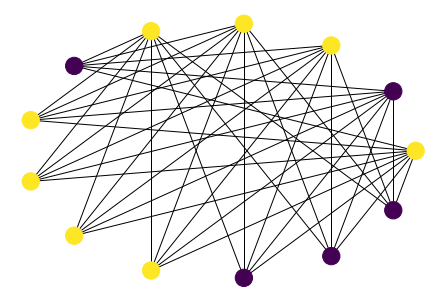

In [58]:
nx.draw_circular(G, node_color=cut_trial)

Теперь же, наконец, реализуем алгоритм Гёманса–Уильямсона

In [6]:
# вычисляем ответ для задачи максимизации (релаксация Гёманса–Уильямсона)
def GW_solve(n, L, verbose=False):
    # X - положительно полуопределенная (PSD) матрица
    X = cvx.Variable((n, n), PSD=True)
    # целевая функция Tr(LX)/4
    obj = 0.25 * cvx.trace(L.toarray() * X)
    # ограничение: на диагонали стоят единички
    constr = [cvx.diag(X) == 1]
    # нам нужно максимизировать
    problem = cvx.Problem(cvx.Maximize(obj), constraints=constr)
    return problem.solve(verbose=verbose, solver=cvx.SCS), X

# выводим результат решение задачи оптимизации 
result, X = GW_solve(n, L, True)
print(result)

----------------------------------------------------------------------------
	SCS v2.1.1 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 104
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 10, rho_x = 1.00e-03
Variables n = 91, constraints m = 104
Cones:	primal zero / dual free vars: 13
	sd vars: 91, sd blks: 1
Setup time: 2.03e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 8.56e+19  1.39e+19  9.42e-01 -2.28e+21 -6.78e+19  1.70e+20  9.45e-03 
    40| 6.43e-07  8.16e-07  2.59e-08 -4.00e+01 -4.00e+01  1.16e-15  1.35e-02 
----------------------------------------------------------------------------
Status: S

Действительно, получилось, что $\mathrm{OPT} \geq \mathrm{MAXCUT}$

Теперь нам нужно восстановить сам разрез по описанному выше алгоритму:

In [7]:
# получаем сам разрез 
def get_random_GW_cut(X):
    # получаем размерность
    n = X.value.shape[0]
    # получаем SVD разложение
    u, s, v = np.linalg.svd(X.value)
    # получаем матрицу Грама U
    U = u * np.sqrt(s)
    # берем случайный вектор на единичной сфере
    h = np.random.randn(n)
    unit_h = h / np.linalg.norm(h)
    # x_i = sign <h, u_i>
    gw_cut = np.sign(U @ unit_h)
    return gw_cut

# Выводим значение полученного разреза
cut(get_random_GW_cut(X), L)

40.0

Как видим, алгоритм нашел действительно максимальный разрез, то есть точность получилась $100\%$. Изобразим этот разрез:

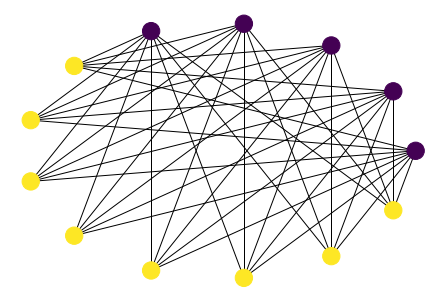

In [8]:
nx.draw_shell(G, node_color=get_random_GW_cut(X))

Видно, что, действительно, вершины из первой доли оказались в одной части разреза, а из другой доли - в другой. 

Теперь протестируем алгоритм на случайных графах. 

Возьмем данные из http://biqmac.uni-klu.ac.at/biqmaclib - по этой ссылке есть архив с описанием всех графов, которые мы будем рассматривать

Ответы здесь: http://biqmac.uni-klu.ac.at/biqmaclib.pdf - pdf-ка с описанием всех графов и табличками с ответами

Для удобства, я вручную переписал всю нужную информацию в файлик input.txt, откуда далее считаю названия графов и ответы (то есть значения величины максимального разреза).

In [9]:
# массив с названиями графов
names = []
# массив с ответами (MAXCUT) для каждого графа
solutions = []

# чтение данных 
for line in open('input.txt'):
    values = line.strip().split()
    names.append(values[0] + '_' + values[1])
    solutions.append(int(values[2]))

# приводим в типу np-array
solutions = np.asarray(solutions)


In [35]:
# ф-ция принимает на вход название файла и возвращает 
# массив ребер графа, который описан в этом файле
def get_edges(name):
    with open(name) as f:
        edges = f.readlines()
    edges = [edge.strip() for edge in edges][1:]    
    return edges

# возвращает pandas табличку с колонками из данных массивов
def get_df(cur_names, maxs, means, cur_solutions):
    pd.set_option("display.precision", 0)
    df = pd.DataFrame(
        list(
            zip(
                cur_names,
                cur_solutions,
                means,
                means / cur_solutions * 100,
                maxs,
                maxs / cur_solutions * 100
            )   
        ),                  
        columns=['Название графа', 'Решение', 'GW Mean', '% Mean', 'GW Max', '% Max']
    ) 
    return df

# запускаем алгоритм для графов, которые заданы в файле 
# input.txt в строчках с номерами с start до finish
def get_results(start, finish):
    # n - количество вершин в графе 
    # у нас всегда будет 100 вершин
    n = 100
    # лучшие величины разреза для каждого графа
    maxs = []
    # средние величины разреза для каждого графа
    means = []
    cur_names = names[start:finish]
    cur_solutions = solutions[start:finish]
    for name in cur_names:
        
        # получаем ребра текущего графа
        edges = get_edges(name)
        
        # создаем граф из них 
        G = nx.parse_edgelist(edges, nodetype = int, data=(('weight',float),))
        # получаем лапласиан этого графа
        L = nx.laplacian_matrix(G)

        # решаем SDP задачу максимизации
        _, X = GW_solve(n, L, False)    
        
        # сделаем try_num попыток восстановить разрез
        try_num = 100
        # все полученные величины разрезов
        cur_maxcut_values = []
        for _ in range(try_num):
            # получаем некоторый разрез
            cur_cut = get_random_GW_cut(X)
            # получаем величину этого разреза
            cur_cut_value = cut(cur_cut, L)
            # добавляем в массив эту величину
            cur_maxcut_values.append(
                cur_cut_value
            )
        # выбираем лучший из полученных разрезов
        maxs.append(max(cur_maxcut_values))
        # берем среднее по всем значениям 
        means.append(np.mean(cur_maxcut_values))

    # приводим массивы к типу np-array
    maxs = np.asarray(maxs)
    means = np.asarray(means)
    # создаем табличку из данных массивов
    df = get_df(cur_names, maxs, means, cur_solutions)
    
    # возвращаем эту табличку а так же среднее средних значений разреза 
    # и среднее среди максимальных значений разреза
    return df, \
            np.mean(means / cur_solutions * 100), \
            np.mean(maxs / cur_solutions * 100)


Запустим алгоритм на графах g05_100.i. Это графы, у которых все ребра имеют вес ровно 1, количество вершин 100, а вероятность каждого ребра равна 0.5

В таблице присутствуют следующие колонки:
* Название графа - оно же имя входного файла, где описан этот граф
* Решение - истинное значение величины максимального разреза
* GW Mean - среднее значение величины разреза, полученное в ходе работы алгоритма (мы делаем несколько попыток восстановить разрез, используя разные случайные вектора h и потом берем среднее по всем результатам)
* % Mean - (GW Mean / Решение) * 100 - то есть какая точность (в процентах) в среднем была достигнута
* GW Max - аналогично GW Mean, только берем лучший из всех полученных разрезов
* % Max - (GW Max / Решение) * 100 - какая точность была достигнута в лучшем случае

In [44]:
%%time
df, mean, max_mean = get_results(0, 10)
print('Средняя точность: %d%%' % mean)
print('Средняя точность (если брать лучший результат по нескольким запускам): %d%%' % max_mean)

display(df)

Средняя точность: 97%
Средняя точность (если брать лучший результат по нескольким запускам): 99%


,Название графа,Решение,GW Mean,% Mean,GW Max,% Max
0,g05_100.0,1430,1397,98,1416,99
1,g05_100.1,1425,1397,98,1419,100
2,g05_100.2,1432,1396,97,1423,99
3,g05_100.3,1424,1392,98,1413,99
4,g05_100.4,1440,1403,97,1432,99
5,g05_100.5,1436,1403,98,1431,100
6,g05_100.6,1434,1400,98,1428,100
7,g05_100.7,1431,1398,98,1422,99
8,g05_100.8,1432,1399,98,1423,99
9,g05_100.9,1430,1398,98,1414,99


CPU times: user 45.1 s, sys: 4.17 s, total: 49.3 s
Wall time: 49.1 s


Видно, что на невзвешенных графах алгоритм получает ответ с очень высокой точностью как в среднем, так и (тем более) в лучшем случае.

Далее, запустим алгоритм на графах pm1s_100.i, это графы (как всегда на 100 вершинах) с весами ребер, выбранными случайно равномерно из $\{-1, 0, 1\}$ и плотностью $10\%$ (то есть, вероятность ребра 0.1)


In [37]:
%%time
df, mean, max_mean = get_results(10, 20)
print('Средняя точность: %d%%' % mean)
print('Средняя точность (если брать лучший результат по нескольким запускам): %d%%' % max_mean)

display(df)

Средняя точность: 85%
Средняя точность (если брать лучший результат по нескольким запускам): 96%


,Название графа,Решение,GW Mean,% Mean,GW Max,% Max
0,pm1s_100.0,127,109,86,122,96
1,pm1s_100.1,126,110,87,121,96
2,pm1s_100.2,125,105,84,119,95
3,pm1s_100.3,111,94,85,105,95
4,pm1s_100.4,128,111,87,125,98
5,pm1s_100.5,128,109,86,120,94
6,pm1s_100.6,122,105,86,119,98
7,pm1s_100.7,112,93,83,107,96
8,pm1s_100.8,120,101,85,119,99
9,pm1s_100.9,127,111,88,124,98


CPU times: user 24.4 s, sys: 2.16 s, total: 26.5 s
Wall time: 21.7 s


Видим, что в среднем результат работы алгоритма уже не такой хороший, как в случае невзвешенного графа, но, тем не менее, довольно близок к теоретической оценке ($85\%$ против $87.8\%$). Однако, в лучшем случае результат по прежнему очень высокий ($96\%$ в среднем)

Далее, запустим алгоритм на графах pm1d_100.i, это графы (как всегда на 100 вершинах) с весами ребер, выбранными случайно равномерно из $\{-1, 0, 1\}$ и плотностью $99\%$ (то есть, вероятность ребра 0.99)

То есть отличие от предыдущих десяти графов только в плотности.

In [38]:
%%time
df, mean, max_mean = get_results(20, 30)
print('Средняя точность: %d%%' % mean)
print('Средняя точность (если брать лучший результат по нескольким запускам): %d%%' % max_mean)

display(df)

Средняя точность: 84%
Средняя точность (если брать лучший результат по нескольким запускам): 95%


,Название графа,Решение,GW Mean,% Mean,GW Max,% Max
0,pm1d_100.0,340,278,82,328,96
1,pm1d_100.1,324,272,84,306,94
2,pm1d_100.2,389,330,85,377,97
3,pm1d_100.3,400,342,86,387,97
4,pm1d_100.4,363,309,85,346,95
5,pm1d_100.5,441,382,87,417,95
6,pm1d_100.6,367,309,84,355,97
7,pm1d_100.7,361,298,83,344,95
8,pm1d_100.8,385,317,82,370,96
9,pm1d_100.9,405,343,85,386,95


CPU times: user 22.5 s, sys: 2.48 s, total: 25 s
Wall time: 22.2 s


Результаты аналогичны предыдущим десяти графам, то есть изменение плотность никак не повлияло на точность.

Теперь рассмотрим графы w09_100.i, Граф с целочисленными весами ребер, выбранными случайно равномерно из $[-10,10]$ и плотностью $0.9$. 

In [39]:
%%time
df, mean, max_mean = get_results(30, 40)
print('Средняя точность: %d%%' % mean)
print('Средняя точность (если брать лучший результат по нескольким запускам): %d%%' % max_mean)

display(df)

Средняя точность: 84%
Средняя точность (если брать лучший результат по нескольким запускам): 95%


,Название графа,Решение,GW Mean,% Mean,GW Max,% Max
0,w09_100.0,2121,1785,84,2024,95
1,w09_100.1,2096,1796,86,2033,97
2,w09_100.2,2738,2383,87,2605,95
3,w09_100.3,1990,1618,81,1863,94
4,w09_100.4,2033,1744,86,1960,96
5,w09_100.5,2433,2101,86,2338,96
6,w09_100.6,2220,1835,83,2115,95
7,w09_100.7,2252,1933,86,2117,94
8,w09_100.8,1843,1506,82,1813,98
9,w09_100.9,2043,1676,82,1997,98


CPU times: user 22.5 s, sys: 2.25 s, total: 24.8 s
Wall time: 20.1 s


Результаты аналогичны предыдущим нескольким запускам, то есть изменение масштаба величины ребер не повлияло на точность

Теперь рассмотрим графы w01_100.i, Граф с целочисленными весами ребер, выбранными случайно равномерно из $[-10,10]$ и плотностью $0.1$. 

То есть отличается только плотность

In [40]:
%%time
df, mean, max_mean = get_results(40, 50)
print('Средняя точность: %d%%' % mean)
print('Средняя точность (если брать лучший результат по нескольким запускам): %d%%' % max_mean)

display(df)

Средняя точность: 85%
Средняя точность (если брать лучший результат по нескольким запускам): 97%


,Название графа,Решение,GW Mean,% Mean,GW Max,% Max
0,w01_100.0,651,555,85,626,96
1,w01_100.1,719,629,87,714,99
2,w01_100.2,676,586,87,654,97
3,w01_100.3,813,719,88,807,99
4,w01_100.4,668,554,83,643,96
5,w01_100.5,643,550,86,618,96
6,w01_100.6,654,539,82,617,94
7,w01_100.7,725,641,88,712,98
8,w01_100.8,721,622,86,711,99
9,w01_100.9,729,629,86,698,96


CPU times: user 26 s, sys: 2.22 s, total: 28.2 s
Wall time: 23 s


Результаты аналогичны

Теперь рассмотрим графы pw05_100.i, графы с целочисленными весами ребер, выбранными случайно равномерно из $[0,10]$ и плотностью $0.5$. 

То есть теперь все веса неотрицательные

In [41]:
%%time
df, mean, max_mean = get_results(50, 60)
print('Средняя точность: %d%%' % mean)
print('Средняя точность (если брать лучший результат по нескольким запускам): %d%%' % max_mean)

display(df)

Средняя точность: 97%
Средняя точность (если брать лучший результат по нескольким запускам): 99%


,Название графа,Решение,GW Mean,% Mean,GW Max,% Max
0,pw05_100.0,8190,7981,97,8119,99
1,pw05_100.1,8045,7838,97,7977,99
2,pw05_100.2,8039,7817,97,7995,99
3,pw05_100.3,8139,7899,97,8080,99
4,pw05_100.4,8125,7921,97,8053,99
5,pw05_100.5,8169,7935,97,8078,99
6,pw05_100.6,8217,8001,97,8138,99
7,pw05_100.7,8249,8041,97,8181,99
8,pw05_100.8,8199,7991,97,8162,100
9,pw05_100.9,8099,7875,97,8044,99


CPU times: user 40.7 s, sys: 3.51 s, total: 44.2 s
Wall time: 38.6 s


Здесь сразу видно, что точность в среднем резко выросла. Теперь запустим на аналогичных графах (тоже с положительными весами ребер) но с другими плотностями ($0.9$ и $0.1$) и убедимся, что, действительно, плотность не влияет на точность, а влияет наличие/отсутствие отрицательных весов у ребер.

In [59]:
%%time
df, mean, max_mean = get_results(60, 70)
print('Средняя точность: %d%%' % mean)
print('Средняя точность (если брать лучший результат по нескольким запускам): %d%%' % max_mean)

display(df)

Средняя точность: 98%
Средняя точность (если брать лучший результат по нескольким запускам): 99%


,Название графа,Решение,GW Mean,% Mean,GW Max,% Max
0,pw09_100.0,13585,13370,98,13534,100
1,pw09_100.1,13417,13220,99,13331,99
2,pw09_100.2,13461,13229,98,13372,99
3,pw09_100.3,13656,13431,98,13589,100
4,pw09_100.4,13514,13286,98,13449,100
5,pw09_100.5,13574,13396,99,13530,100
6,pw09_100.6,13640,13408,98,13557,99
7,pw09_100.7,13501,13294,98,13438,100
8,pw09_100.8,13593,13363,98,13542,100
9,pw09_100.9,13658,13441,98,13622,100


CPU times: user 58.3 s, sys: 5.34 s, total: 1min 3s
Wall time: 1min


In [60]:
%%time
df, mean, max_mean = get_results(70, 80)
print('Средняя точность: %d%%' % mean)
print('Средняя точность (если брать лучший результат по нескольким запускам): %d%%' % max_mean)

display(df)

Средняя точность: 95%
Средняя точность (если брать лучший результат по нескольким запускам): 98%


,Название графа,Решение,GW Mean,% Mean,GW Max,% Max
0,pw01_100.0,2019,1921,95,1975,98
1,pw01_100.1,2060,1962,95,2050,100
2,pw01_100.2,2032,1924,95,1998,98
3,pw01_100.3,2067,1969,95,2045,99
4,pw01_100.4,2039,1934,95,2013,99
5,pw01_100.5,2108,1997,95,2084,99
6,pw01_100.6,2032,1946,96,2005,99
7,pw01_100.7,2074,1977,95,2066,100
8,pw01_100.8,2022,1909,94,1988,98
9,pw01_100.9,2005,1925,96,1984,99


CPU times: user 35.8 s, sys: 2.96 s, total: 38.7 s
Wall time: 34.1 s


## Вывод
Алгоритм в среднем работает с высокой (значительно большей теоритически полученной) точностью для графов с положительными весами ребер. Для графов с произвольными весами ребер алгоритм в среднем работает с точностью близкой к теоритической. Если же брать не средний, а лучший результат по нескольким запускам, то алгоритм всегда работает с достаточно высокой точностью. Кроме того, можно заметить, что на более плотных графах алгоритм может работать дольше (это хорошо видно особенно на последних двух запусках) 

## P.S.
Ранее мы обозначили $\alpha_{GW} := \min _{0<\vartheta<\pi} \frac{2 \vartheta }{(1-\cos \vartheta) \pi}$. Это число и было точностью нашего алгоритма. Покажем, что оно действительно примерно равно $0.878$

In [19]:
theta = np.linspace(0 + 1e-8, np.pi, 1e7)
min(2 * theta / ((1 - np.cos(theta)) * np.pi))

0.8785672057848526

## Список литературы
* Оригинальная статья http://www-math.mit.edu/~goemans/PAPERS/maxcut-jacm.pdf
* Лекция (Михаил Вялый) https://youtu.be/RNYfcl3hxUk, https://docplayer.ru/58779485-Priblizhennoe-reshenie-zadach-kombinatornoy-optimizacii-algoritmy-i-trudnost-lekciya-4-sdp-relaksacii-i-algoritm-gyomansa-vilyamsona.html
* Лекция (Александр Катруца) https://github.com/amkatrutsa/optimization-fivt/blob/master/13-SDP/lecture13.pdf
* Graphs and Graph Laplacians https://www.cis.upenn.edu/~cis515/cis515-14-graphlap.pdf